# SUBMITTED BY : R MEGHA

# TASK 2 - To Explore Supervised Machine Learning

Simple Linear Regression -- In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

### Importing Libraries

To import necessary libraries for this task , execute the following import statements:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Reading the data

The following command imports the CSV dataset using pandas:

In [2]:
url = "http://bit.ly/w-data"
stu_data = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


In [3]:
stu_data.shape  # This means that our dataset has 25 rows and 2 columns.

(25, 2)

In [4]:
stu_data.head(20)  # This method retrives the first 20 records(0 to 19) from our dataset.

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


##### To see the statistical details of the dataset, we can use describe():

In [5]:
 stu_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


##### Now let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following code:

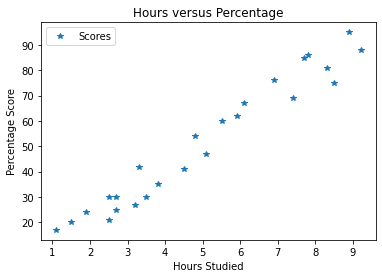

In [6]:
stu_data.plot(x='Hours' , y='Scores' , style='*')
plt.title('Hours versus Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

# In the above code, we use plot() function of the pandas dataframe and pass it the names for x and y coordinates, which are 'Hours' and 'Scores' respectively

From the above graph, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

### Preparing the Data

The next step is to divide the data into "attributes"(inputs) and "labels"(outputs). Attributes are independent variable and labels are dependent variables. Our aim is to predict the Scores based on the number of Hours the student has studied , therefore the attribute set will contain "Hours" column and the label will contain "Score" column 

In [7]:
X = stu_data.iloc[: , :-1].values
y = stu_data.iloc[: , 1].values

# The attributes and labels are stored in variables X and Y, we specified -1 as the range for X bcoz we wanted our attribute set to contain all the columns except the last one which is "Scores"

### Splitting the Data 

Now that we have our attributes and labels , the next step is to split this data into training sets and test sets. For this we will use Scikit-Learn's built-in method called train_test_split().

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

# The above snippet splits 80% of the data to training set while 20% of the test set.

### Training the Algorithm / Model

We have splitted our data into Training and testing sets, now it's time to train our model, to do this we have to import LinearRegression class, instantiate it, and call the fit() method along with our training data

In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print("Training the model is completed!")

Training the model is completed!


Linear Regression model basically finds the best value for the intercept and slope, which results in a line that best fits the data. To see the value of the intercept and slope calculated by the linear regression algorithm for our dataset execute the following code-

In [10]:
# To see the value of intercept:

print(regressor.intercept_)


2.018160041434683


In [11]:
# To see the value of slope:

print(regressor.coef_)


[9.91065648]


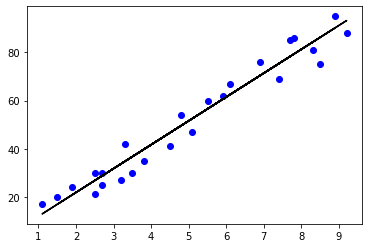

In [12]:
# Plotting the regression line
line = regressor.coef_*X + regressor.intercept_

# Plotting the test area
plt.scatter(X,y, color='blue' , marker='o')
plt.plot(X,line, color='black')
plt.show()

### Making Predictions

Now that we have trained our model, its time to make some predictions. To do so, we will use our test data and see how accurately our model predicts the % score. To make predictions on the test data, execute the following code:

In [13]:
print(X_test)   # Testing data
predictions = regressor.predict(X_test)
predictions

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [14]:
# comparing Actual output values for X_test with the Predicted values.
df = pd.DataFrame({'Actual':y_test,'Predicted':predictions})
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [15]:
# Though our model is not very precise, the predicted percentages are close to the actual ones.

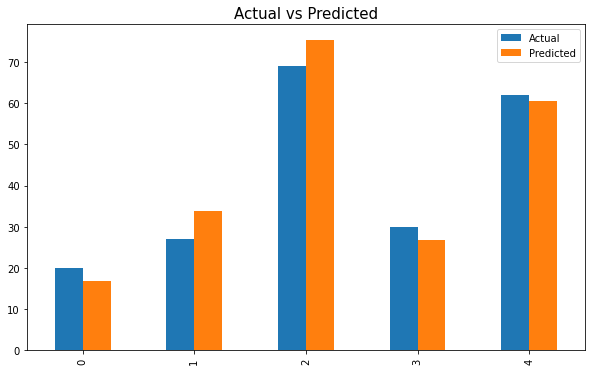

In [16]:
# Plotting the bar chart to show the actual and predicted value.

df.plot(kind='bar', figsize=(10,6))
plt.title("Actual vs Predicted" , size=15)
plt.show()

###### Predicting the Scores

The scores is been predicted(within scale 10) by taking input from user.

In [17]:
hours = int(input("Enter the total number of hrs studied : "))
user_pred = regressor.predict([[hours]])
print("No. of Hours Studied = {}".format(hours))
print("Predicted Score after studying = {:.2f}%".format(user_pred[0]))

Enter the total number of hrs studied : 5
No. of Hours Studied = 5
Predicted Score after studying = 51.57%


##### Question: what will be predicted score if a student studies for 9.25 hours per day?

In [18]:
hours = 9.25
predicted = regressor.predict([[hours]])
print("No of hours = {}".format(hours)) 
print("The Predicted Score = {}".format(predicted[0]))                               

No of hours = 9.25
The Predicted Score = 93.69173248737538


### Evaluating the model

The final step is to evaluate the performance of model. For regression models, three evaluation metrics are commonly used:

1. Mean Absolute Error(MAE)   
2. Mean Squared error(MSE)
3. Root Mean Squared Error(RMSE)



In [19]:
from sklearn import metrics
print("Mean Absolute ERROR(MAE) : ", metrics.mean_absolute_error(y_test, predictions))
print("Mean Squared ERROR(MsE) : ", metrics.mean_squared_error(y_test, predictions))
print("Root Mean Squared ERROR(RMSE) : ", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute ERROR(MAE) :  4.183859899002975
Mean Squared ERROR(MsE) :  21.5987693072174
Root Mean Squared ERROR(RMSE) :  4.6474476121003665


# TASK COMPLETED!

## THANK YOU.